In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [3]:
def event_happens(occurrence_probability):
    """
    Description: An event happens if a randomly chosen number
                    falls bellow the given occurrence probability 
    Input: probability of occurrence
    Output: 
    """
    return np.random.rand() < occurrence_probability

In [4]:
def lognormal_event_result(lower, upper):
    """
    Description: draws number from lognormal distribution w/ given 
                 lower and upper loss amount within 90% CI
    Input: lower, upper end of 90% CI
    Output: event w lower and upper bounds
    """
    mean = (np.log(lower) + np.log(upper))/2.0
    std_dv = (np.log(upper) - np.log(lower))/3.29 
    return np.random.lognormal(mean, std_dv)

Example(s): 

- Simulate insolvency risk at 9% probability and loss between $1,000 and $50,000 (90% CI).
- Simulate liquidation risk at 20% probability and loss between $1,000 and $50,000 (90% CI).

In [39]:
i = 0
while i < 20:
    if event_happens(0.09):
        loss_due_to_liquidity_risk = lognormal_event_result(1000, 50000)
        print('Loss due to insolvency was ${:,.2f}'.format(loss_due_to_liquidity_risk))
    else:
        print('A loss due to insolvency did not occur.')
    i += 1

A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
Loss due to insolvency was $9,357.78
A loss due to insolvency did not occur.
Loss due to insolvency was $5,909.82
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
A loss due to insolvency did not occur.
Loss due to insolvency was $22,912.49


In [40]:
i = 0
while i < 20:
    if event_happens(0.2):
        loss_due_to_liquidity_risk = lognormal_event_result(1000, 50000)
        print('Loss due to liquidation was ${:,.2f}'.format(loss_due_to_liquidity_risk))
    else:
        print('A loss due to liquidation did not occur.')
    i += 1

A loss due to liquidation did not occur.
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.
Loss due to liquidation was $1,581.63
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.
Loss due to liquidation was $44,146.63
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.
A loss due to liquidation did not occur.


In [41]:
# Build a portfolio of liquidity risk events
# *Subjective Inputs* based on expert judgement, historical data etc. 

liquidity_risk_events = {
    "Risk": ['Liquidity_Risk_Depositors', 'Liquidity_Risk_Borrowers', 'Insolvencies', 'Liquidations'],
    "Probability": [0.03, 0.02, 0.09, 0.20],
    "Lower": [1000, 1000, 1000, 1000],
    "Upper": [50000, 50000, 50000, 50000]
}

liquidity_risk_events_df = pd.DataFrame(liquidity_risk_events)
liquidity_risk_events_df.head()

,Risk,Probability,Lower,Upper
0,Liquidity_Risk_Depositors,0.03,1000,50000
1,Liquidity_Risk_Borrowers,0.02,1000,50000
2,Insolvencies,0.09,1000,50000
3,Liquidations,0.20,1000,50000


**Note**: Longer risk descriptions are shorten for brevity. These risk definitions are works-in-progress. 

**Liquidity_Risk_Depositors**: Lending pool utilization is pushed to excessive levels (>100%) if large depositor withdraws (e.g., USDC pool utilization gets pushed up if large whale withdraws).

**Liquidity_Risk_Borrowers**: Lending pool utilization is pushed to excessive levels (>100%) if large borrower position gets liquidated (e.g., USDC pool utilization gets pushed up if large whale gets liquidated).

**Insolvencies**: When insolvencies as % of available liquidity is too high. When asset net insolvent value (%), sum net insolvent value / total collateral value, is excessive (e.g., Borrowers who use USDC as collateral become insolvent). 

**Liquidations**: Liquidations as % of available liquidity is too high. (e.g., Multiple borrowers who use USDC as collateral get liquidated). 

In [46]:
# All of the events in the above table can happen in a single year. 
# To simulate a scenario, we need to find out, for each of them, 
# if they happen, how much money it will cost. 

def simulate_scenario(events):
    """
    Description: simulate if events from the liquidity risk events list happens, 
                add up losses due to it. 
    Input: dataframe
    Output: Single loss figure from multiple events. 
    """
    total_loss = 0
    for risk in liquidity_risk_events_df.itertuples():
        if event_happens(risk.Probability):
            total_loss += lognormal_event_result(risk.Lower, risk.Upper)
    return total_loss

simulate_scenario(liquidity_risk_events_df)

2244.970672669395

In [47]:
def monte_carlo(events, iterations):
    annual_losses = []
    for i in range(iterations):
        loss_amount = simulate_scenario(liquidity_risk_events_df)
        annual_losses.append(loss_amount)
    return annual_losses

yearly_losses = monte_carlo(liquidity_risk_events_df, iterations = 1000)
print(yearly_losses)

[43861.52826174275, 0, 75856.40224582277, 0, 0, 13693.165004490053, 0, 0, 0, 0, 0, 0, 9402.23939698226, 0, 0, 0, 4242.170512868761, 0, 0, 5693.925490963931, 0, 0, 0, 0, 0, 0, 0, 12042.897067659176, 13655.163758027324, 0, 0, 27759.868462934002, 2655.61080075151, 0, 0, 0, 0, 1358.827176222412, 0, 1403.285363620091, 9747.900618682947, 14482.383412660452, 0, 0, 0, 0, 12770.763809508557, 0, 0, 6944.499284858194, 5862.235617800905, 0, 0, 0, 981.4829846180475, 0, 0, 0, 0, 0, 0, 0, 0, 7761.562830871542, 5102.981083111355, 4291.390671310981, 0, 0, 25352.441727492176, 0, 0, 34389.37833924245, 2247.231936606572, 0, 0, 3540.839976857653, 10771.522630891372, 0, 3102.1026682581205, 0, 0, 12465.489407895657, 957.6461134512319, 17035.892758767703, 11623.507328207053, 14753.806497471087, 0, 0, 0, 0, 0, 0, 0, 1155.4361114642147, 8693.968872437888, 0, 8667.797421398534, 0, 0, 860.1314094613541, 6599.995447304405, 0, 0, 84588.20845311158, 0, 0, 6960.785208928899, 0, 430.1786263059009, 0, 24305.93826475824

In [48]:
# Test Monte Carlo execution time for x number of iterations
# Results in seconds 

import time 

start_time = time.time()
monte_carlo(liquidity_risk_events_df, iterations = 1000)
print(time.time() - start_time)

0.17100906372070312


In [49]:
# Run the Monte Carlo simulation, save results as a pandas Series and numpy array

results = monte_carlo(liquidity_risk_events_df, iterations = 1000)
results_series = pd.Series(results)
results_nparray = np.array(results)
results_series.describe()

results_nparray

array([     0.        ,      0.        ,      0.        ,   2114.29535874,
            0.        ,      0.        ,      0.        ,      0.        ,
        47696.90298963,   8793.97941185,      0.        ,    823.27859933,
       169463.16266216,      0.        ,      0.        ,      0.        ,
            0.        ,  58200.58070272,      0.        ,   8900.17504287,
        16106.32569268,      0.        ,   6650.57087084,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,  25396.83243163,
         5350.88529419,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,   1542.70318211,      0.        ,
          321.13088822,   6653.54373628,   2481.44622921,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
        15797.66853359,      0.        ,  14031.76445002,      0.        ,
            0.        ,  

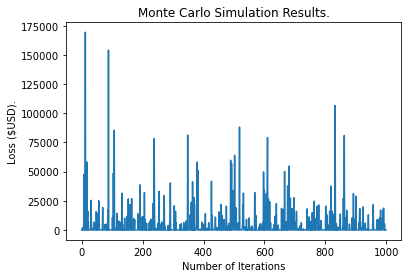

In [51]:
# Plot results in order they came out

results_series.plot()
plt.ticklabel_format(axis='y', style='plain', scilimits=(6,6))
plt.xlabel('Number of Iterations')
plt.ylabel('Loss ($USD).')
plt.title('Monte Carlo Simulation Results.')
plt.show()
# plt.savefig('results-raw.png')

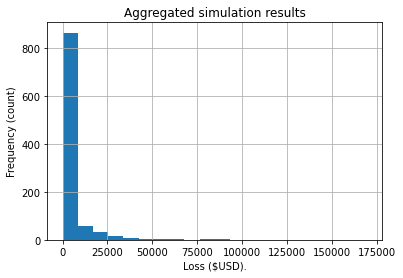

In [54]:
# Aggregate and plot as a histogram

results_series.hist(bins=20)
plt.xlabel('Loss ($USD).')
plt.ylabel('Frequency (count)')
plt.ticklabel_format(axis='x', style='plain', scilimits=(6,6))
plt.title('Aggregated simulation results')
plt.show()
# plt.savefig('results-hist.png')

In [56]:
def plot_lec(results_nparray, label):
    """
    Description: Plot loss exceedance curve from array of Monte Carlo results
    Input: numpy array, string
    Output: plot
    """
    hist, edges = np.histogram(results_nparray, bins=40)
    cumrev = np.cumsum(hist[::-1]*100/len(results_nparray))[::-1]
    plt.plot(edges[:-1], cumrev, label=label)
    plt.xlabel('Loss ($USD)')
    plt.ylabel('Probability of loss or greater (%)')
    plt.ticklabel_format(axis='x', style='plain', scilimits=(6,6))
    plt.title('Loss Exceedance Curve')
    plt.grid()
    #plt.xscale('log')

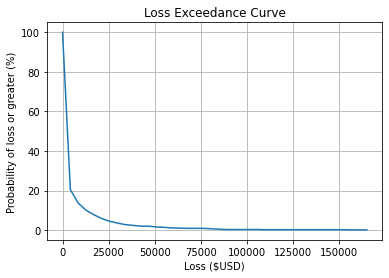

In [57]:
plot_lec(results_nparray, label = 'Inherent Risk')
#plt.savefig('lec-simple.png')

In [80]:
def plot_lec_log(results_nparray, label):
    """
    Description: Plot loss exceedance curve from array of Monte Carlo results
    Input: numpy array, string
    Output: plot
    """
    hist, edges = np.histogram(results_nparray, bins=40)
    cumrev = np.cumsum(hist[::-1]*100/len(results_nparray))[::-1]
    plt.plot(edges[:-1], cumrev, label=label)
    plt.xlabel('Loss ($USD)')
    plt.ylabel('Probability of loss or greater (%)')
    plt.ticklabel_format(axis='x', style='plain', scilimits=(6,6))
    plt.title('Loss Exceedance Curve')
    plt.grid()
    plt.xscale('log')

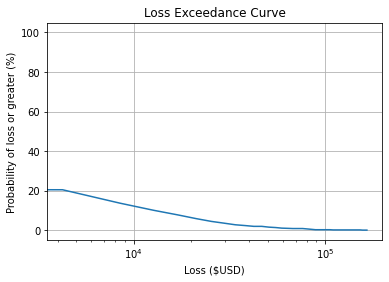

In [81]:
# 10^4 = 10,000
# 10^5 = 100,000
# There's a 20% chance of losing 0, 10-12% chance of losing $10,000, (near) 0% chance of losing $100,000

plot_lec_log(results_nparray, label = 'Inherent Risk')

**Risk Tolerance**: 

Quantifying probabilities of events and range of loss is the first step towards *actual decision making*, the next step is to assess risk tolerance.

In [68]:
# Obtain residual risk curve

liquidity_risk_residual = {
    "Risk": ['Liquidity_Risk_Depositors', 'Liquidity_Risk_Borrowers', 'Insolvencies', 'Liquidations'],
    "Probability": [0.02, 0.01, 0.05, 0.1],
    "Lower": [500, 500, 500, 500],
    "Upper": [25000, 25000, 25000, 25000]
}

liquidity_risk_residual_df = pd.DataFrame(liquidity_risk_residual)
liquidity_risk_residual_df.head()

,Risk,Probability,Lower,Upper
0,Liquidity_Risk_Depositors,0.02,500,25000
1,Liquidity_Risk_Borrowers,0.01,500,25000
2,Insolvencies,0.05,500,25000
3,Liquidations,0.10,500,25000


Text(0.5, 1.0, 'Risk Curves')

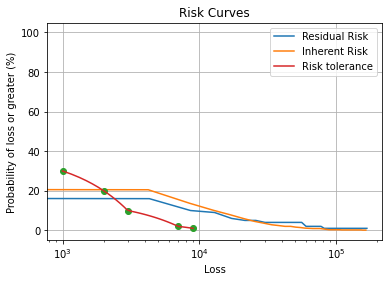

In [79]:
# Obtain residual risk curve cont.

results_residual = monte_carlo(liquidity_risk_residual_df, iterations = 100)

arr_residual = np.array(results_residual)
plot_lec(arr_residual, label = 'Residual Risk')
plot_lec(results_nparray, label = 'Inherent Risk')
plt.xscale('log')
plt.xlabel('Loss')
plt.grid()

# Interpolate the risk tolerance curve
xs = np.array([1,2,3,7,9])*(1e3)
tols = np.array([30,20,10,2,1])

plt.plot(xs, tols, 'o')
xint = np.linspace(min(xs), max(xs))
yint = interpolate.interp1d(xs, tols, kind='slinear')
plt.plot(xint, yint(xint), label='Risk tolerance')
plt.xscale('log')
plt.legend()
plt.title('Risk Curves')
#plt.savefig('risk-curves-together.png')